# Multiclass classification model using a custom convolutional neural network in tensorflow. 

## Problem statement: 

- To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for `75% of skin cancer deaths`. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Dataset Description: 

- The `dataset consists of 2357 images` of malignant and benign oncological diseases, which were formed from the `International Skin Imaging Collaboration (ISIC)`. All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant.

`The data set contains the following diseases:`

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion


### Note:

- The model training may take time to train and hence we have used **`Google colab`** to train the model

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [12]:
# Imorting necessary libraries for CNN model creation , model visualization and for acccessing images from path/directories

import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Activation,Conv2D,Dropout,BatchNormalization,MaxPooling2D,AveragePooling2D,Flatten
import cv2
from tensorflow.keras.models import Sequential
import glob
from keras.preprocessing.image import ImageDataGenerator
import warnings
import seaborn as sns

# Setting parameters for ignoring warnings and displaying the whole dataframe rows

warnings.filterwarnings("ignore")

%matplotlib inline
pd.set_option('display.max_colwidth', 2000)

### Checking all GPU parameters:

In [13]:
# checking whether tensorflow is interacting with GPU device or not

if tf.test.gpu_device_name():
     print((tf.test.gpu_device_name()))
else:
     print('GPU not available')

/device:GPU:0


In [14]:
# Allocating 100% GPU memory to this session for tensorflow

gpu_opts=tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=1)
sess=tf.compat.v1.Session(config=tf.compat.v1.ConfigProto(gpu_options=gpu_opts))

In [15]:
# Checking where the tensorflow is interacting with GPU and with CUDA version 11.2

print(tf.test.is_built_with_cuda())
print(tf.config.list_physical_devices('GPU'))

True
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [16]:
# Check the GPU device system information like which GPU is allocated , CUDA version, GPU memory etc.

! nvidia-smi

Sun Apr 11 13:45:08 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P0    30W /  70W |    222MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Mounting Google drive to use Google colab and UNZIPPED

In [17]:
## If you are using the data by mounting the google drive, use the following :

# Mounting google drive in google colab for training model
# commenting out the code as drive already mounted

#from google.colab import drive
#drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [18]:
# UNZIP the CNN assignment dataset in the google drive 
# Commenting the out the code as it is already unzipped

# ! unzip /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/CNN_assignment.zip

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

#### Note: 

- After mounting google drive and unzipped the skin cancer image data folder , `commenting out` the above code block,please uncomment it , if needs to use it again

### Specifying the path from Google drive and checking the image count

In [19]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset from google drive

# path used for train: "/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
# path used for test : "/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Test"

data_dir_train = pathlib.Path("/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path("/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Test")


In [20]:
# displaying the total image count in the Train folder and in Test folder

# image count in Train folder

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

# image count in test folder

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [21]:
# defining the batch size , image height X image width for training the model

batch_size = 32
img_height = 180
img_width = 180

### Train / Validation split:

- Use 80% of the images for training, and 20% for validation.

In [22]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# used tf.keras.preprocessing.image_dataset_from_directory for loading the image from train folder into train_ds (training split) dataset,used seed =123 with image size 180 X 180 

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [23]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset

# used tf.keras.preprocessing.image_dataset_from_directory for loading the image from train folder into val_ds (validation split) dataset,used seed =123 with image size 180 X 180 

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [24]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.

# storing the class name into variable from train dataset

class_names = train_ds.class_names

# printing all the class name present in train dataset

print(class_names)

# storing the count of class name into variable from train dataset

number_of_class=len(class_names)

# printing total count of class name present in train dataset

print(" ")
print("Number of class :"+ str(number_of_class))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
 
Number of class :9


### Inference:

- There are total `9 classes of skin cancer`


- Classes are `'actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'`

### Visualizing the data

#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

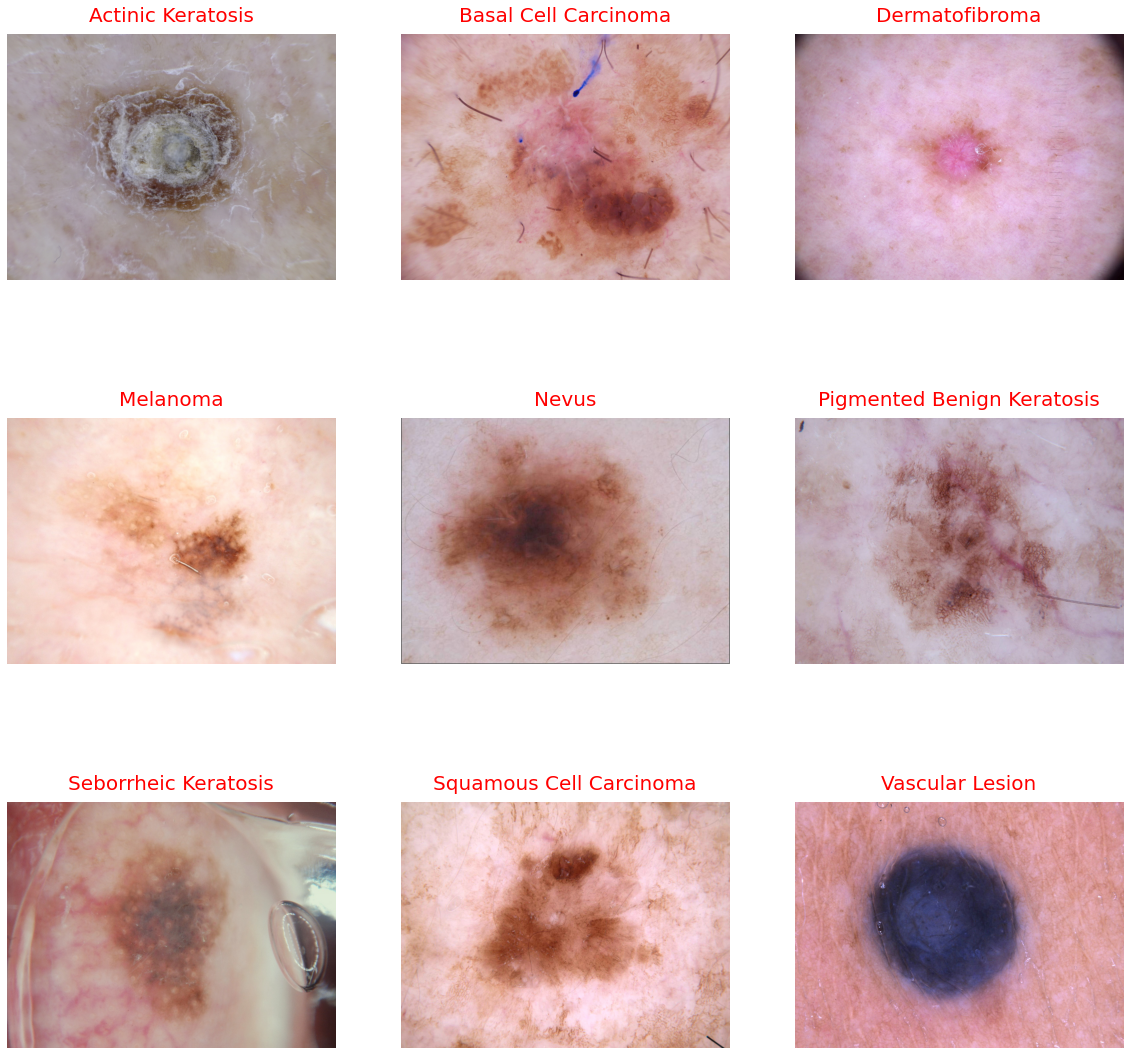

In [25]:
### your code goes here, you can use training or validation data to visualize

# Visualize the one instance of all 9 classes present in train dataset/folder

# defining the image size

plt.figure(figsize=(20,20))

# looping through each class in train directory

for j,clsname in enumerate(class_names):
    
    # preparing the path for picking the image from that directory 

    path=pathlib.Path(os.path.join(data_dir_train,clsname))

    # use subplot
    
    plt.subplot(3,3,j+1)

    # looping through each subdirectory 

    for img in os.listdir(path):

        # reading the image from subdirectory using open cv

        imgshow=cv2.imread(os.path.join(path,img))

        # formating the image and showing it

        image = cv2.cvtColor(imgshow, cv2.COLOR_BGR2RGB )
        plt.imshow(image)
        plt.axis('off')
        plt.title(clsname.title(),fontsize=20,color='red',pad=12)

        # breaking the loop only to display one instance of every image in a directory

        break
plt.show()
        

### Inference:

- Above are the images of 1 instance of skin cancer from all 9 classes present in the `train folder`

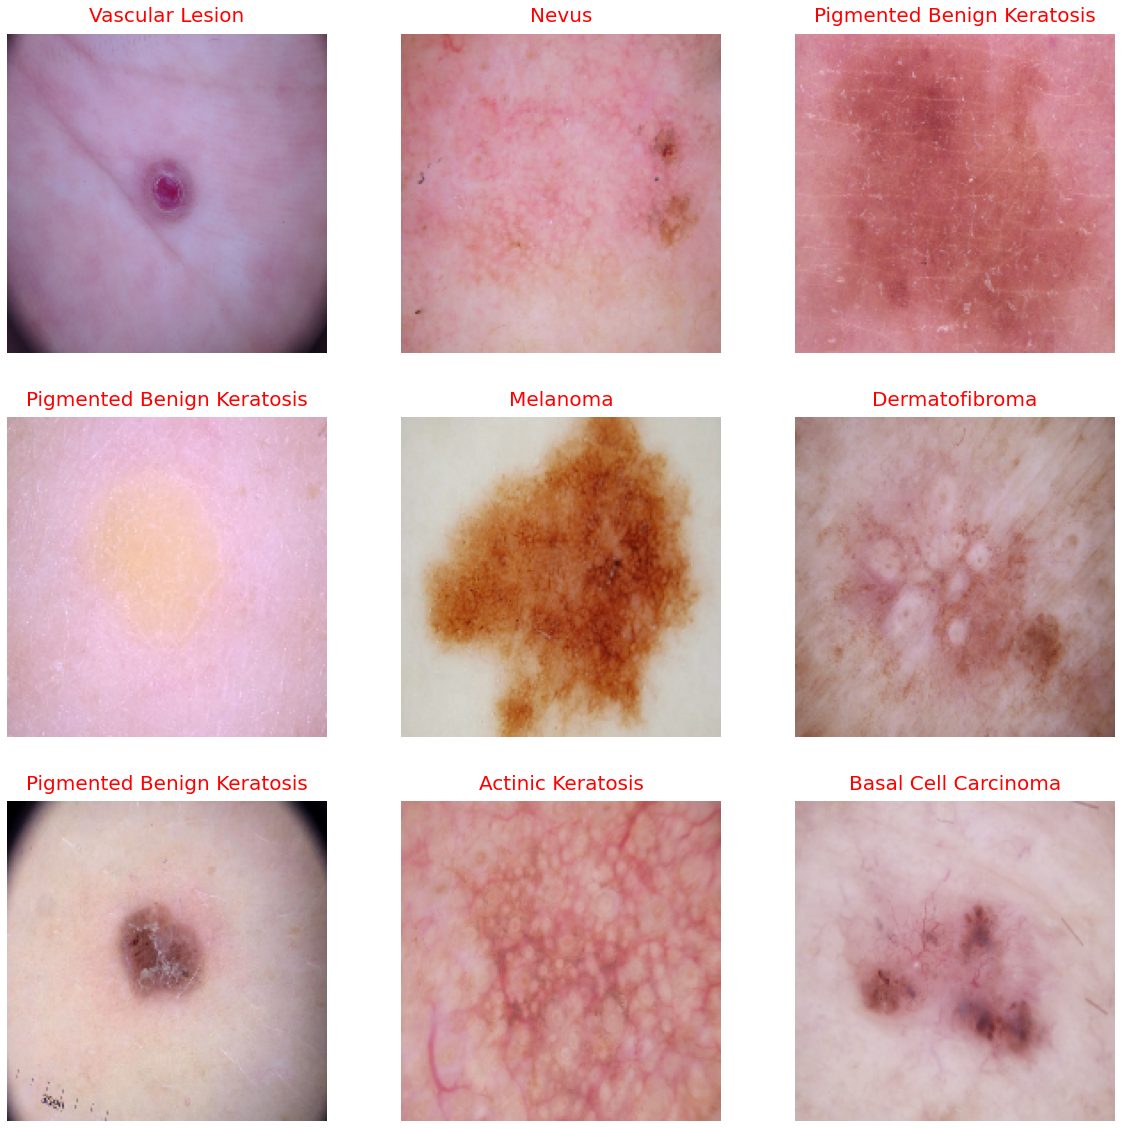

In [26]:
### your code goes here, you can use training or validation data to visualize

# Visualize the one instance of all 9 classes present in train dataset at random

# defining the image size

plt.figure(figsize=(20, 20))

# looping through all images in a train dataset using take

for images, labels in train_ds.take(1):
    for idx in range(9):

        # use subplot

        ax = plt.subplot(3, 3, idx + 1)

        # ploting the image using imshow after comverting it to numpy array format with proper datatype

        plt.imshow(images[idx].numpy().astype("uint8"))

        # formating the image

        plt.title(class_names[labels[idx]].title(),fontsize=20,color='red',pad=12)
        plt.axis("off")
plt.show()

### Inference:

- Above are the images of 1 instance of skin cancer at random from all 9 classes present in the `train dataset`

## Performance Improvement:

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [27]:
# use Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.
# use Dataset.prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create the model with CNN

#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

### CNN model 1:

In [ ]:
### Your code goes here

# defining the CNN model with 2 convolution layers (activation = relu ), 2 max pooling layers , one fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 64/128 and filter size of 3 * 3 
# max pooling layers of pool size 2 * 2
# 1 FC layers with 128 neurons

model=Sequential()

# rescaling the input image pixels between (0,1) and input shape of (180,180,3)

model.add(layers.experimental.preprocessing.Rescaling(scale=1.0/255,input_shape=(img_height, img_width,3)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(number_of_class,activation='softmax'))


### Compile the CNN model 1

- Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function

# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary

In [ ]:
# View the summary of all layers

model.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_20 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_165 (Conv2D)          (None, 180, 180, 64)      1792      
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 90, 90, 64)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 45, 45, 64)        0         
_________________________________________________________________
flatten_33 (Flatten)         (None, 129600)            0         
_________________________________________________________________
dense_91 (Dense)             (None, 128)             

### Train the CNN  model 1

In [ ]:
# fitting the model used 20 epochs with training and validation set

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 26s 165ms/step - loss: 3.5460 - accuracy: 0.1709 - val_loss: 2.0609 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 5s 87ms/step - loss: 1.9892 - accuracy: 0.2259 - val_loss: 1.8507 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 5s 87ms/step - loss: 1.7290 - accuracy: 0.3916 - val_loss: 1.5172 - val_accuracy: 0.4922
Epoch 4/20
56/56 [==============================] - 5s 87ms/step - loss: 1.4829 - accuracy: 0.4864 - val_loss: 1.4142 - val_accuracy: 0.5257
Epoch 5/20
56/56 [==============================] - 5s 87ms/step - loss: 1.3056 - accuracy: 0.5388 - val_loss: 1.3966 - val_accuracy: 0.5034
Epoch 6/20
56/56 [==============================] - 5s 86ms/step - loss: 1.2438 - accuracy: 0.5677 - val_loss: 1.4046 - val_accuracy: 0.5235
Epoch 7/20
56/56 [==============================] - 5s 87ms/step - loss: 1.0787 - accuracy: 0.6242 - val_loss: 1.4783 - val_accuracy: 0.4989
Epoch 8/20


### Visualizing training results of CNN model 1

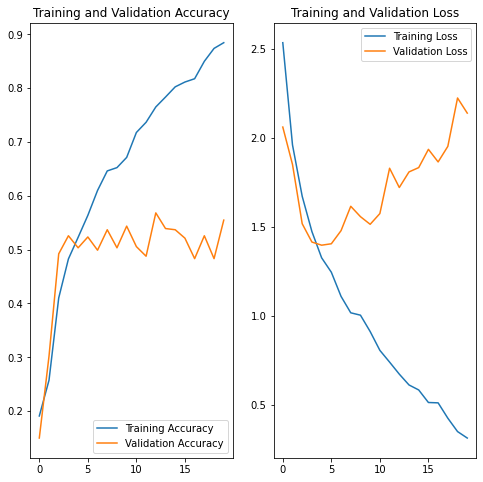

In [ ]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:

- We can see from the aobve graphs , that the model is very much **`overfitted`** ,with the train accuracy of `0.8796` (87%) and validation accuracy of `0.5548`(55%)


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `0.3273` and validation loss of `2.1393`. After a certain point in validation set, model has stop learning, hence loss increases.

### CNN model 2:

In [ ]:
### Your code goes here

# defining the CNN model with 4 convolution layers (activation = relu ), 2 max pooling layers , one fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 32/64 and filter size of 3 * 3 and dropouts with probability of 0.25
# max pooling layers of pool size 2 * 2
# 1 FC layers with 512 neurons and dropouts with probability of 0.5


model = Sequential()

# rescaling the input image pixels between (0,1) and input shape of (180,180,3)

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = (1.0 / 255), input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class, activation='softmax'))

### Compile the CNN model 2:

- Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function

# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary

In [ ]:
# View the summary of all layers

model.summary()

Model: "sequential_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_21 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_168 (Conv2D)          (None, 178, 178, 32)      9248      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_169 (Conv2D)          (None, 89, 89, 64)        18496     
_________________________________________________________________
conv2d_170 (Conv2D)          (None, 87, 87, 64)      

### Train the CNN  model 2:

In [ ]:
 # fitting the model used 20 epochs with training and validation set

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 11s 178ms/step - loss: 3.9156 - accuracy: 0.1580 - val_loss: 1.9886 - val_accuracy: 0.2752
Epoch 2/20
56/56 [==============================] - 10s 174ms/step - loss: 1.9397 - accuracy: 0.2467 - val_loss: 2.0050 - val_accuracy: 0.2752
Epoch 3/20
56/56 [==============================] - 10s 173ms/step - loss: 1.9129 - accuracy: 0.2588 - val_loss: 2.0845 - val_accuracy: 0.2707
Epoch 4/20
56/56 [==============================] - 10s 173ms/step - loss: 2.0817 - accuracy: 0.2110 - val_loss: 1.8802 - val_accuracy: 0.3110
Epoch 5/20
56/56 [==============================] - 10s 173ms/step - loss: 1.8065 - accuracy: 0.3251 - val_loss: 1.7075 - val_accuracy: 0.4027
Epoch 6/20
56/56 [==============================] - 10s 173ms/step - loss: 1.6394 - accuracy: 0.4154 - val_loss: 1.8326 - val_accuracy: 0.3311
Epoch 7/20
56/56 [==============================] - 10s 174ms/step - loss: 1.7334 - accuracy: 0.3456 - val_loss: 1.6868 - val_accuracy: 0.3937

### Visualizing training results of CNN model 2:

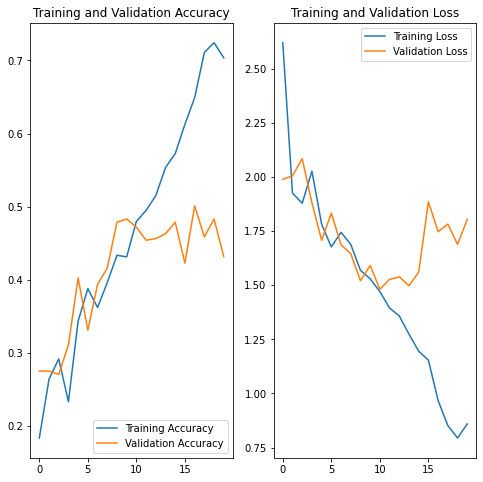

In [ ]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:

- After introduction of `droput layers` as well we can see from the aobve graphs , that the model is very much **`overfitted`** ,with the train accuracy of `0.7380` (73%) and validation accuracy of `0.4318`(43%)


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `0.7779` and validation loss of `1.8039`. After a certain point in validation set, model has stop learning, hence loss increases.

### CNN model 3:

In [ ]:
# defining the CNN model with 4 convolution layers (activation = relu ), 2 max pooling layers , one fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 32/64 and filter size of 3 * 3 with dropouts and batch normalization after convolution layers and FC layers
# used padding 'same'
# max pooling layers of pool size 2 * 2
# 1 FC layers with 512 neurons

model = Sequential()

# rescaling the input image pixels between (0,1) and input shape of (180,180,3)

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = (1.0 / 255), input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class, activation='softmax'))

### Compile the CNN model 3:

- Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function

# compiling the model used optimizers 'Adagrad' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer='Adagrad',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adagrad`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Train the CNN  model 3:

In [ ]:
# fitting the model used 20 epochs with training and validation set

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 13s 211ms/step - loss: 5.9274 - accuracy: 0.3061 - val_loss: 3.1471 - val_accuracy: 0.1946
Epoch 2/20
56/56 [==============================] - 12s 206ms/step - loss: 1.5490 - accuracy: 0.4431 - val_loss: 4.7114 - val_accuracy: 0.1544
Epoch 3/20
56/56 [==============================] - 12s 206ms/step - loss: 1.3280 - accuracy: 0.5403 - val_loss: 5.9680 - val_accuracy: 0.1521
Epoch 4/20
56/56 [==============================] - 12s 206ms/step - loss: 1.1626 - accuracy: 0.5834 - val_loss: 7.3685 - val_accuracy: 0.1544
Epoch 5/20
56/56 [==============================] - 12s 206ms/step - loss: 1.0560 - accuracy: 0.6074 - val_loss: 7.7861 - val_accuracy: 0.1700
Epoch 6/20
56/56 [==============================] - 12s 206ms/step - loss: 0.9744 - accuracy: 0.6544 - val_loss: 7.3564 - val_accuracy: 0.2058
Epoch 7/20
56/56 [==============================] - 12s 207ms/step - loss: 0.8968 - accuracy: 0.6876 - val_loss: 6.3569 - val_accuracy: 0.2282

### Visualizing training results of CNN model 3:

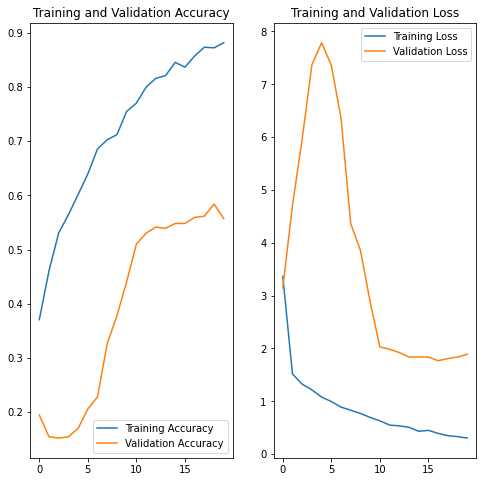

In [ ]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:

- After introduction of `dropout layer and batch normlization` also used `Adagrad optimizer` as well we can see from the aobve graphs , that the model is very much **`overfitted`** ,with the train accuracy of `0.8908` (89%) and validation accuracy of `0.5570`(55%)


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `0.2890` and validation loss of `1.8887`. After a certain point in validation set, model has stop learning, hence loss increases.

### CNN model 4:

In [ ]:
### Your code goes here
# defining the CNN model with 4 convolution layers (activation = relu ), 2 max pooling layers , one fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 32/64 and filter size of 3 * 3 with dropouts and batch normalization after convolution layers and FC layers
# used padding 'same'
# max pooling layers of pool size 2 * 2
# 1 FC layers with 512 neurons


model = Sequential()

# rescaling the input image pixels between (0,1) and input shape of (180,180,3)

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = (1.0 / 255), input_shape=(img_height, img_width,3)))
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (3,3), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_class, activation='softmax'))

### Compile the CNN model 4:

- Choose an appropirate optimiser and loss function for model training 

In [ ]:
# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary:

In [ ]:
# View the summary of all layers

model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_23 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_175 (Conv2D)          (None, 180, 180, 32)      896       
_________________________________________________________________
batch_normalization_20 (Batc (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_176 (Conv2D)          (None, 178, 178, 32)      9248      
_________________________________________________________________
batch_normalization_21 (Batc (None, 178, 178, 32)      128       
_________________________________________________________________
max_pooling2d_86 (MaxPooling (None, 89, 89, 32)        0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 89, 89, 32)      

### Train the CNN  model 4:

In [ ]:
# fitting the model used 20 epochs with training and validation set

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 12s 208ms/step - loss: 59.5028 - accuracy: 0.2845 - val_loss: 32.8532 - val_accuracy: 0.0962
Epoch 2/20
56/56 [==============================] - 11s 205ms/step - loss: 3.6946 - accuracy: 0.2692 - val_loss: 112.2435 - val_accuracy: 0.0492
Epoch 3/20
56/56 [==============================] - 11s 204ms/step - loss: 2.0224 - accuracy: 0.2969 - val_loss: 102.7226 - val_accuracy: 0.0492
Epoch 4/20
56/56 [==============================] - 11s 204ms/step - loss: 1.9910 - accuracy: 0.3144 - val_loss: 103.3413 - val_accuracy: 0.0492
Epoch 5/20
56/56 [==============================] - 11s 204ms/step - loss: 1.9308 - accuracy: 0.3200 - val_loss: 75.5569 - val_accuracy: 0.0492
Epoch 6/20
56/56 [==============================] - 11s 204ms/step - loss: 1.9386 - accuracy: 0.3203 - val_loss: 43.6973 - val_accuracy: 0.0738
Epoch 7/20
56/56 [==============================] - 11s 204ms/step - loss: 1.8938 - accuracy: 0.3131 - val_loss: 23.5482 - val_accur

### Visualizing training results of CNN model 4:

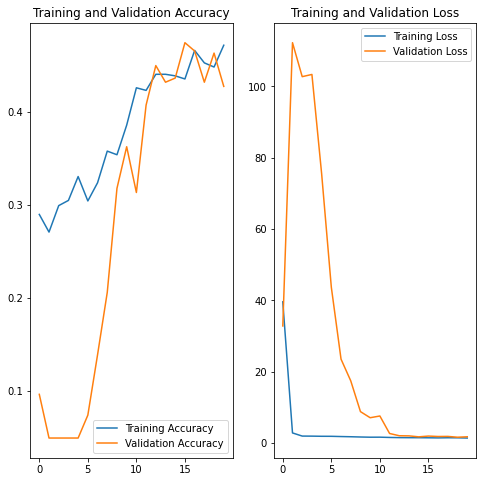

In [ ]:
# visualizing the results after model fit

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:

- After introduction of `dropout layer and batch normlization` also used `Adam optimizer` we can see from the aobve graphs , that the model is reduced its **`Overfitted`** behaviour, somewhat **`Underfit`** ,with the train accuracy of `0.4851` (87%) and validation accuracy of `0.4273`(55%).


- But the model accuracy is decreased very much in train as well as validation set.


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `1.4194` and validation loss of `1.7948`. After a certain point in validation set, model has stop learning, hence loss increases.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## Inference on the first activity performed above:


- From the above activities or model training activities (4 CNN model trained) it has been evident that the majority of the models are **`Overfitted`** 


**` CNN Model 1 `**:

- We can see from the aobve graphs , that the model is very much **`overfitted`** ,with the train accuracy of `0.8796` (87%) and validation accuracy of `0.5548`(55%)


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `0.3273` and validation loss of `2.1393`. After a certain point in validation set, model has stop learning, hence loss increases.

**` CNN Model 2 `**:

- After introduction of `droput layers` as well we can see from the aobve graphs , that the model is very much **`overfitted`** ,with the train accuracy of `0.7380` (73%) and validation accuracy of `0.4318`(43%)


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `0.7779` and validation loss of `1.8039`. After a certain point in validation set, model has stop learning, hence loss increases.

**` CNN Model 3 `**:


- After introduction of `dropout layer and batch normlization` also used `Adagrad optimizer` as well we can see from the aobve graphs , that the model is very much **`overfitted`** ,with the train accuracy of `0.8908` (89%) and validation accuracy of `0.5570`(55%)


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `0.2890` and validation loss of `1.8887`. After a certain point in validation set, model has stop learning, hence loss increases.


**` CNN Model 4 `**:


-  After introduction of `dropout layer and batch normlization` also used `Adam optimizer` we can see from the aobve graphs , that the model is reduced its **`Overfitted`** behaviour, somewhat **`Underfit`** ,with the train accuracy of `0.4851` (87%) and validation accuracy of `0.4273`(55%).


- But the model accuracy is decreased very much in train as well as validation set.


- We can see from the aobve graphs , that the model has stop learning in terms of loss optimization,with the train loss of `1.4194` and validation loss of `1.7948`. After a certain point in validation set, model has stop learning, hence loss increases.

## Data Augmentation strategy performed:

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# used data augmentation strategy on the fly ,used rescalling/random flip/random rotation

data_augmentation = tf.keras.Sequential()
data_augmentation.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width,3)))
data_augmentation.add(layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",seed=123))
data_augmentation.add(layers.experimental.preprocessing.RandomRotation(0.2,seed=123))


### Below data augmentation strategy used:

- Rescaling

- RandomFlip

- RandomRotation

### Visualizing 1 instance of image after augmentation:

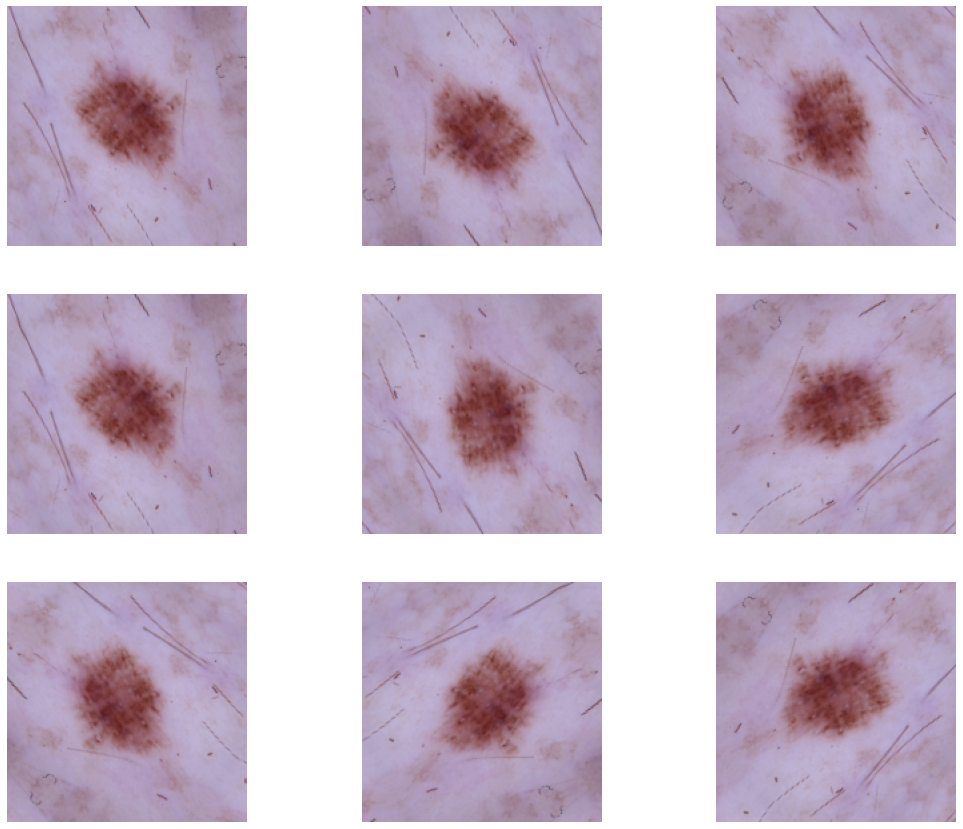

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# visualize any one instance of augmented image 

# defining the figure size

plt.figure(figsize=(18, 15))

# looping through images in train dataset

for image,label in train_ds.take(1):
    for i in range(9):

        # passing the image in the augmedted function defined

        augmented_image = data_augmentation(image)

        # formating and visualize the image

        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_image[0])
        plt.axis("off")

### Create CNN model 1 after data augmentation:

In [ ]:
### Your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# defining the CNN model with 4 convolution layers (activation = relu ), 2 max pooling layers , two fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 64/128 and filter size of 1 * 1/2 * 2/3 * 3
# used padding 'same'
# max pooling layers of pool size 2 * 2
# 2 FC layers with 512/1024 neurons

model = Sequential()

# adding data augmentation layers

model.add(data_augmentation)
model.add(Conv2D(64, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(number_of_class, activation='softmax'))

### Compile the CNN model 1:

- Choose an appropirate optimiser and loss function for model training 

In [ ]:
# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary:

In [ ]:
# View the summary of all layers

model.summary()

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_62 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_215 (Conv2D)          (None, 180, 180, 64)      256       
_________________________________________________________________
conv2d_216 (Conv2D)          (None, 179, 179, 64)      16448     
_________________________________________________________________
max_pooling2d_106 (MaxPoolin (None, 89, 89, 64)        0         
_________________________________________________________________
conv2d_217 (Conv2D)          (None, 89, 89, 128)       32896     
_________________________________________________________________
conv2d_218 (Conv2D)          (None, 87, 87, 128)       147584    
_________________________________________________________________
max_pooling2d_107 (MaxPoolin (None, 43, 43, 128)     

### Train the CNN  model 1:

In [ ]:
# fitting the model used 20 epochs with training and validation set

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 397ms/step - loss: 3.1088 - accuracy: 0.1971 - val_loss: 1.9302 - val_accuracy: 0.3177
Epoch 2/20
56/56 [==============================] - 21s 371ms/step - loss: 1.8051 - accuracy: 0.3355 - val_loss: 1.7687 - val_accuracy: 0.3020
Epoch 3/20
56/56 [==============================] - 21s 370ms/step - loss: 1.6863 - accuracy: 0.3740 - val_loss: 1.6784 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 21s 370ms/step - loss: 1.5900 - accuracy: 0.4453 - val_loss: 1.5779 - val_accuracy: 0.4541
Epoch 5/20
56/56 [==============================] - 21s 369ms/step - loss: 1.4819 - accuracy: 0.4759 - val_loss: 1.4349 - val_accuracy: 0.4966
Epoch 6/20
56/56 [==============================] - 21s 369ms/step - loss: 1.4777 - accuracy: 0.4801 - val_loss: 1.3581 - val_accuracy: 0.5280
Epoch 7/20
56/56 [==============================] - 21s 369ms/step - loss: 1.3528 - accuracy: 0.5331 - val_loss: 1.4163 - val_accuracy: 0.5101

### Visualizing training results of CNN model 1:

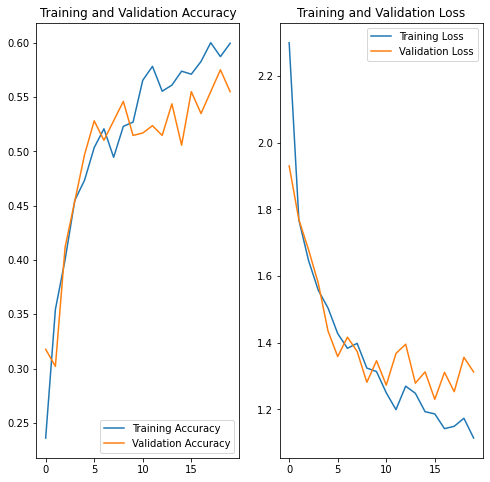

In [ ]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:

- We can see from the aobve graphs , that the model is **`not overfitted`** ,with the train accuracy of `0.5985` (59%) and validation accuracy of `0.5548`(55%)


- But the model has low accuracy on both training and validation set.


- We can see from the aobve graphs , low loss optimization,with the train loss of `1.1123` and validation loss of `1.3119`. 


- `Loss is not reduced` so much.

### Perform a different data augmentation strategy:

In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here

# used data augmentation strategy on the fly ,used rescalling/random flip/random rotation/random zoom

data_augmentation = tf.keras.Sequential()
data_augmentation.add(layers.experimental.preprocessing.Rescaling(1./255,input_shape=(img_height, img_width,3)))
data_augmentation.add(layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical",seed=123))
data_augmentation.add(layers.experimental.preprocessing.RandomRotation(0.2,seed=123))
data_augmentation.add(layers.experimental.preprocessing.RandomZoom(.5,seed=123))


### Below data augmentation strategy used:

- Rescaling

- RandomFlip

- RandomRotation

- RandomZoom

### Visualizing the image after new augmentation:

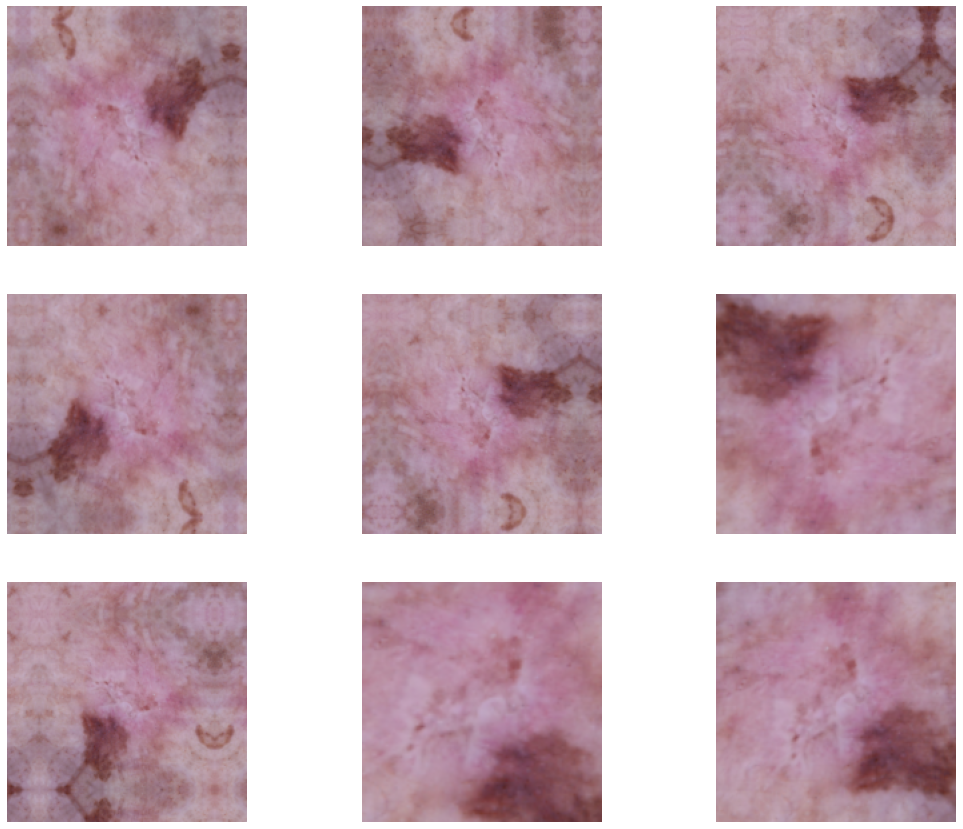

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

# visualize any one instance of augmented image 

# defining the figure size

plt.figure(figsize=(18, 15))

# looping through images in train dataset

for image,label in train_ds.take(1):
    for i in range(9):

        # passing the image in the augmedted function defined

        augmented_image = data_augmentation(image)
        ax = plt.subplot(3, 3, i + 1)

        # formating and visualize the image

        plt.imshow(augmented_image[0])
        plt.axis("off")

### Create the CNN model 2 after augmention:


In [ ]:
### Your code goes here

## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

# defining the CNN model with 6 convolution layers (activation = relu ), 3 max pooling layers , 2 fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 16/32/64 and filter size of 1 * 1/2 * 2
# used padding 'same'
# max pooling layers of pool size 2 * 2
# 2 FC layers with 1024 neurons


model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(Conv2D(16, kernel_size = (1,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(Conv2D(32, kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(number_of_class, activation='softmax'))

### Compile the CNN model 2:

- Choose an appropirate optimiser and loss function for model training 

In [ ]:
# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary:

In [ ]:
# View the summary of all layers

model.summary()

Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_65 (Sequential)   (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_219 (Conv2D)          (None, 180, 180, 16)      64        
_________________________________________________________________
conv2d_220 (Conv2D)          (None, 180, 180, 16)      272       
_________________________________________________________________
max_pooling2d_108 (MaxPoolin (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_221 (Conv2D)          (None, 90, 90, 32)        2080      
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 89, 89, 32)        4128      
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 44, 44, 32)      

### Train the CNN  model 2:

In [ ]:
# fitting the model used 20 epochs with training and validation set

epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 116ms/step - loss: 2.0936 - accuracy: 0.1906 - val_loss: 1.8814 - val_accuracy: 0.3065
Epoch 2/20
56/56 [==============================] - 6s 112ms/step - loss: 1.9063 - accuracy: 0.2584 - val_loss: 1.7128 - val_accuracy: 0.4004
Epoch 3/20
56/56 [==============================] - 6s 112ms/step - loss: 1.6950 - accuracy: 0.3653 - val_loss: 1.7482 - val_accuracy: 0.3311
Epoch 4/20
56/56 [==============================] - 6s 112ms/step - loss: 1.6307 - accuracy: 0.4015 - val_loss: 1.5447 - val_accuracy: 0.4586
Epoch 5/20
56/56 [==============================] - 6s 111ms/step - loss: 1.5364 - accuracy: 0.4585 - val_loss: 1.6042 - val_accuracy: 0.4989
Epoch 6/20
56/56 [==============================] - 6s 112ms/step - loss: 1.3883 - accuracy: 0.5053 - val_loss: 1.3517 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 6s 111ms/step - loss: 1.4028 - accuracy: 0.5056 - val_loss: 1.3017 - val_accuracy: 0.5503
Epoch 

### Visualizing training results of CNN model 2:

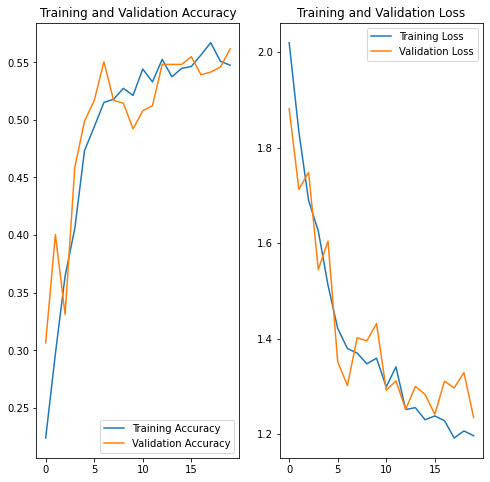

In [ ]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()


### Inference:

- After changing the filter size and adding one more convolution layer as well we can see from the aobve graphs , that the model is **`not overfitted`** ,with the train accuracy of `0.5438` (54%) and validation accuracy of `0.5615`(56%)


- But the model has low accuracy on both training and validation set.


- We can see from the aobve graphs , low loss optimization,with the train loss of `1.2055` and validation loss of `1.2348`.


- `Loss is not reduced` so much.

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### Inference on overall activity performed using data augmentation:

- We can see that the model **`has not been overfitted`** now after augmentation, but still it has `low accuracy` and we can tell it is somewhat **`Underfitted`** with grater loss.


- `After data augmentation strategy` we cann see that the model has improved in terms of reduced `Overfitment`.



**`CNN Model 1 with data augemntation`**:


- We can see from the aobve graphs , that the model is **`not overfitted`** ,with the train accuracy of `0.5985` (59%) and validation accuracy of `0.5548`(55%)


- But the model has low accuracy on both training and validation set.


- We can see from the aobve graphs , low loss optimization,with the train loss of `1.1123` and validation loss of `1.3119`. 


- `Loss is not reduced` so much.



**`CNN Model 2 with data augemntation`**:


- After changing the filter size and adding one more convolution layer as well we can see from the aobve graphs , that the model is **`not overfitted`** ,with the train accuracy of `0.5438` (54%) and validation accuracy of `0.5615`(56%)


- But the model has low accuracy on both training and validation set.


- We can see from the aobve graphs , low loss optimization,with the train loss of `1.2055` and validation loss of `1.2348`.


- `Loss is not reduced` so much.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

## Visualize Class distribution in training dataset:

In [28]:
## Your code goes here.

# preparing the image count and class name list to show the image distribution per class.

# defining the list

image_list=[]
image_cls=[]
image_count=[]

# loop through each class

for clsname in class_names:
    
    ## append the class in the list
    
    image_cls.append(clsname.title())
    
    # preparing the path of each subdirectpry
    
    path=pathlib.Path(os.path.join(data_dir_train,clsname))
    
    # looping through each path and appending the images in a list and finding the image count
    
    for imgs in os.listdir(path):
        image_list.append(imgs)
    image_count.append(len(image_list))
    image_list.clear()

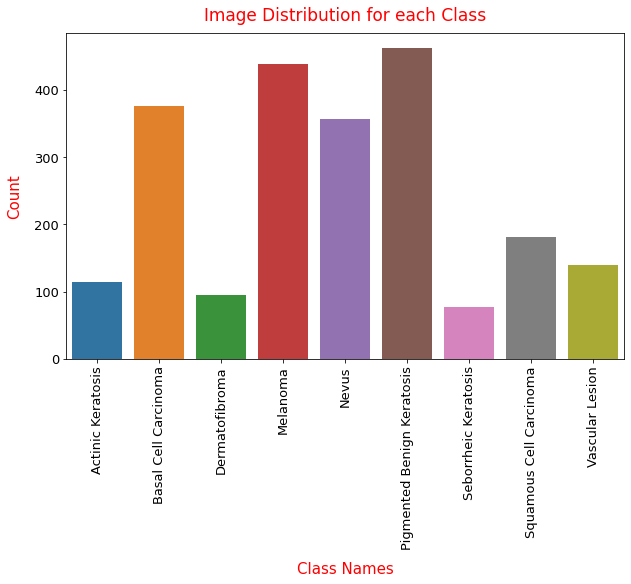

 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 
Class Name : Actinic Keratosis,  Image Count : 114 (5.092%)
 
 
Class Name : Basal Cell Carcinoma,  Image Count : 376 (16.793%)
 
 
Class Name : Dermatofibroma,  Image Count : 95 (4.243%)
 
 
Class Name : Melanoma,  Image Count : 438 (19.562%)
 
 
Class Name : Nevus,  Image Count : 357 (15.945%)
 
 
Class Name : Pigmented Benign Keratosis,  Image Count : 462 (20.634%)
 
 
Class Name : Seborrheic Keratosis,  Image Count : 77 (3.439%)
 
 
Class Name : Squamous Cell Carcinoma,  Image Count : 181 (8.084%)
 
 
Class Name : Vascular Lesion,  Image Count : 139 (6.208%)
 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [29]:
# plotting the image distribution per class

# defining the image size

plt.figure(figsize=(10,6))

# ploting the barplot with image class vs image count in each class

sns.barplot(image_cls,image_count)

# formating the plot

plt.title('Image Distribution for each Class',fontsize=17,color='red',pad=12)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Class Names',fontsize=15,color='red',labelpad=12)
plt.ylabel('Count',fontsize=15,color='red',labelpad=12)
plt.show()
print(' ')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')

# printing the percentage distribution and count of image in each class

for cls,count in zip(image_cls,image_count):
    print(' ')
    print('Class Name : {0},  Image Count : {1} ({2}%)'.format(cls.title(),count,round((count/image_count_train)*100,3)))
    print(' ')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


### Inference:

- `Seborrheic Keratosis` has the least number of sample `Image Count : 77 (3.439%)`.


- `Pigmented Benign Keratosis ` dominate the data in terms proportionate number of samples with `Image Count : 462 (20.634%)`




**`Whole class distribution`**


- Class Name : Actinic Keratosis,  Image Count : 114 (5.092%)
 
 
- Class Name : Basal Cell Carcinoma,  Image Count : 376 (16.793%)
 
 
- Class Name : Dermatofibroma,  Image Count : 95 (4.243%)
 
 
- Class Name : Melanoma,  Image Count : 438 (19.562%)
 
 
- Class Name : Nevus,  Image Count : 357 (15.945%)
 
 
- Class Name : Pigmented Benign Keratosis,  Image Count : 462 (20.634%)
 
 
- Class Name : Seborrheic Keratosis,  Image Count : 77 (3.439%)
 
 
- Class Name : Squamous Cell Carcinoma,  Image Count : 181 (8.084%)
 
 
- Class Name : Vascular Lesion,  Image Count : 139 (6.208%)
 

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

## Rectification of class imbalance using ' Augmentor' class

In [11]:
# installing the augmentor class

!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [30]:
# creating the 500 sample per class using augmentor class

# defining the train folder path

path_to_training_dataset="/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"

# import augmentor class

import Augmentor

# adding augmentor pipeline, defining the operation and creating 500 sample each class

for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F53C4AAF110>: 100%|██████████| 500/500 [00:18<00:00, 26.36 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F53C4A77D10>:   0%|          | 1/500 [00:00<01:06,  7.54 Samples/s]

Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53C4AAFE50>: 100%|██████████| 500/500 [00:18<00:00, 26.73 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53C4AD7410>: 100%|██████████| 500/500 [00:19<00:00, 25.13 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F53C4AD7E90>: 100%|██████████| 500/500 [01:23<00:00,  5.96 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F5411C00E90>: 100%|██████████| 500/500 [01:20<00:00,  6.23 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53C4B2F810>: 100%|██████████| 500/500 [00:19<00:00, 25.55 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F5410036F10>:   0%|          | 1/500 [00:00<01:33,  5.36 Samples/s]

Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F53C4AFC3D0>: 100%|██████████| 500/500 [00:41<00:00, 12.17 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53C45A2B90>: 100%|██████████| 500/500 [00:19<00:00, 26.13 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53C4ABDBD0>:   0%|          | 1/500 [00:00<01:02,  8.04 Samples/s]

Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F53C4B2F390>: 100%|██████████| 500/500 [00:19<00:00, 25.76 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

- Created 500 sample of each class image and store it in train dataset in each class

## Class distribution check after adding new 500 sample per calss

In [31]:
# counting the images after creating the 500 sample per class created by augmentor class

image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [32]:
# preparing the path for each images within each class of original train set and displaying it

path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
path_list

['/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0032270.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0027903.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0027888.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0027563.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0027269.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/ISIC_0030956.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin

In [33]:
# preparing the labels per image per class of original train set and displaying it

lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*','*.jpg'))]
lesion_list

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [34]:
# creating a dictionary containing unique image path as keys and image label as values

dataframe_dict_original = dict(zip(path_list, lesion_list))

In [35]:
# creating a dataframe from the above dictionary

original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])

In [36]:
# checking the image count per class from original train set

original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Inference:

- Above are the Class distribution of images per class before creation of 500 sample per class.



In [37]:
# preparing the path for each images within each class of new set after creating 500 sample and displaying it

path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new

['/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0024475.jpg_917d6261-836f-41a2-a150-346b09b42160.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0031759.jpg_811bd584-9686-4c15-bc5c-73b11497f0c5.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0032614.jpg_ca8bb3a8-6955-4a35-98f9-20f667f8039f.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output/vascular lesion_original_ISIC_0026092.jpg_386095b5-5c3d-4aa1-8a54-b5f9db0a031c.jpg',
 '/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The Inter

In [38]:
# preparing the labels per image per class of new train set after creating 500 sample and displaying it

lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [39]:
# creating a dictionary containing unique image path as keys and image label as values

dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [40]:
# creating a dataframe from the above dictionary and appending with original dataframe earlier created

df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [41]:
# checking the image count per class from new set plus original set

new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

### Inference:

- Above are the class distribution of the images per class after creation of 500 sample per class.

## Class distribution visualize after creation of 500 samples per class

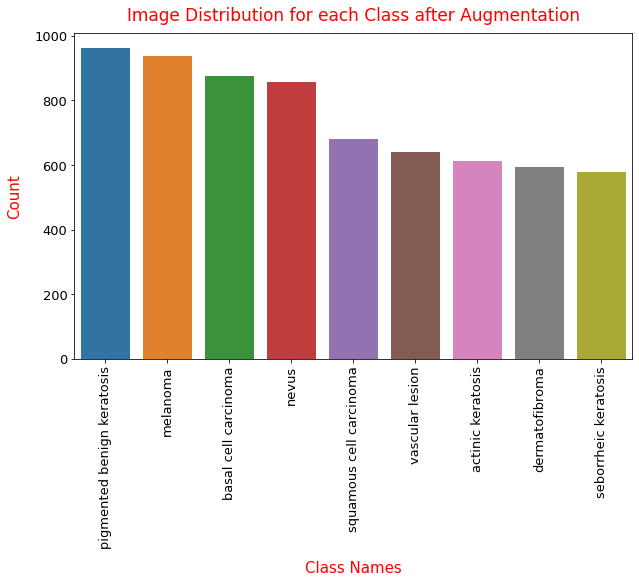

 
Percentage Distribution for each Class after Augmentation
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 
pigmented benign keratosis    14.275115
melanoma                      13.918979
basal cell carcinoma          12.998961
nevus                         12.717020
squamous cell carcinoma       10.105357
vascular lesion                9.482119
actinic keratosis              9.111144
dermatofibroma                 8.829203
seborrheic keratosis           8.562101
Name: Label, dtype: float64
 
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [42]:
# visualizing the total image distribution per class after new 500 sample created per class

# definig the image size

plt.figure(figsize=(10,6))

# ploting the barplot class name vs count of image per class

sns.barplot(new_df['Label'].value_counts().index,new_df['Label'].value_counts().values)

# formating the plot

plt.title('Image Distribution for each Class after Augmentation',fontsize=17,color='red',pad=12)
plt.xticks(rotation=90,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Class Names',fontsize=15,color='red',labelpad=12)
plt.ylabel('Count',fontsize=15,color='red',labelpad=12)
plt.show()
print(' ')
print('Percentage Distribution for each Class after Augmentation')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(' ')

# showing / displaying the percentage image distribution per class 

print(new_df['Label'].value_counts(normalize=True)*100)
print(' ')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')


- So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Inference:

- We have added the 500 sample per class and above is the distribution of each class after that in terms of percentage.


- ` pigmented benign keratosis ` has the higest dominance 


- `seborrheic keratosis` has the lowest dominance

#### **Todo**: Train the model on the data created using Augmentor

### Defining some model training parameters

In [45]:
# defining the batch size and image height and width

batch_size = 32
img_height = 180
img_width = 180

### **Todo:** Create a training dataset

In [44]:
# used tf.keras.preprocessing.image_dataset_from_directory for loading the image from train folder into train_ds (training split) dataset,used seed =123 with image size 180 X 180 

data_dir_train="/content/gdrive/MyDrive/DATA_SCIENCE/CNN_ASSIGNMENT/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### **Todo:** Create a validation dataset

In [46]:
# used tf.keras.preprocessing.image_dataset_from_directory for loading the image from train folder into val_ds (validation split) dataset,used seed =123 with image size 180 X 180 

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [47]:
# storing the class name into variable from train dataset

class_names = train_ds.class_names

# printing all the class name present in train dataset

print(class_names)

# storing the count of class name into variable from train dataset

number_of_class=len(class_names)
print(" ")

# printing total count of class name present in train dataset

print("Number of class :"+ str(number_of_class))

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
 
Number of class :9


### Inference:

- There are total `9 classes of skin cancer`


- Classes are `'actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion'`

### CNN model 1 after recitification of class imbalance (used batch normalization and rescaling):

#### **Todo:** Create your model (make sure to include normalization)

In [74]:
## your code goes here
# defining the CNN model with 4 convolution layers (activation = relu ), 2 max pooling layers , one fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 16/32 and filter size of 1 * 1/2 * 2 with dropouts and batch normalization after convolution layers, dropouts after FC layer
# used padding 'same'
# max pooling layers of pool size 2 * 2
# 1 FC layers with 512 neurons


model = Sequential()

# rescaling the input image pixels between (0,1) and input shape of (180,180,3)

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = (1.0 / 255), input_shape=(img_height, img_width,3)))
model.add(Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = (1,1), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(number_of_class, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

### Compile the CNN model 1

- Choose an appropirate optimiser and loss function for model training 

In [75]:
## your code goes here

# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary:

In [76]:
# View the summary of all layers

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 180, 180, 16)      64        
_________________________________________________________________
batch_normalization_24 (Batc (None, 180, 180, 16)      64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 180, 180, 16)      272       
_________________________________________________________________
batch_normalization_25 (Batc (None, 180, 180, 16)      64        
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 90, 90, 16)       

#### **Todo:**  Train your model

### Train the CNN  model 1:

In [77]:
## Your code goes here, use 50 epochs.
# fitting the model used 50 epochs with training and validation set

epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 48s 274ms/step - loss: 16.2802 - accuracy: 0.2965 - val_loss: 84.9194 - val_accuracy: 0.1091
Epoch 2/50
169/169 [==============================] - 47s 274ms/step - loss: 1.5991 - accuracy: 0.4012 - val_loss: 90.0121 - val_accuracy: 0.1180
Epoch 3/50
169/169 [==============================] - 47s 271ms/step - loss: 1.4756 - accuracy: 0.4380 - val_loss: 53.6970 - val_accuracy: 0.1945
Epoch 4/50
169/169 [==============================] - 47s 271ms/step - loss: 1.3216 - accuracy: 0.4821 - val_loss: 28.1000 - val_accuracy: 0.3430
Epoch 5/50
169/169 [==============================] - 46s 267ms/step - loss: 1.2674 - accuracy: 0.5090 - val_loss: 22.4333 - val_accuracy: 0.4001
Epoch 6/50
169/169 [==============================] - 47s 272ms/step - loss: 1.1491 - accuracy: 0.5534 - val_loss: 13.3136 - val_accuracy: 0.4432
Epoch 7/50
169/169 [==============================] - 46s 265ms/step - loss: 1.1055 - accuracy: 0.5699 - val_loss: 12.6988 

#### **Todo:**  Visualize the model results

### Visualizing training results of CNN model 1:

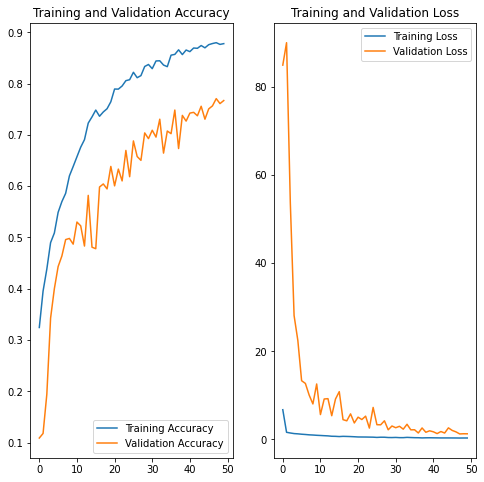

In [78]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:


- we have used dropouts with batch normalization , We can see from the aobve graphs , that the model is **`less/minimum overfitted`** ,with the train accuracy of `0.8696` (86%) and validation accuracy of `0.7669`(76%)


- But the model has `increased in accuracy` on both training and validation set.


- We can see from the aobve graphs , good loss optimization,with the train loss of `0.3427` and validation loss of `1.2676`. 


- Overall `Loss is reduced`.



### CNN model 2 after rectifying class imbalance:

In [87]:
## your code goes here

# defining the CNN model with 6 convolution layers (activation = relu ), 3 max pooling layers , one fully connected layers (activation = relu ) and one output layer (activation = softmax)
# convolution layers with number of filters 16/32/64 and filter size of 1 * 1/2 * 2 with dropouts and batch normalization after convolution layers and FC layers
# used padding 'same'
# max pooling layers of pool size 2 * 2
# 1 FC layers with 512 neurons

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(scale = (1.0 / 255), input_shape=(img_height, img_width,3)))
model.add(Conv2D(16, kernel_size = (1,1), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(16, kernel_size = (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.29))

model.add(Conv2D(32, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.29))

model.add(Conv2D(64, kernel_size = (2,2), padding = 'same', activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = (2,2), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.27))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.29))
model.add(Dense(number_of_class, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

### Compile the CNN model 2:

- Choose an appropirate optimiser and loss function for model training 

In [88]:
## your code goes here

# compiling the model used optimizers 'Adam' ,  loss function as 'sparse_categorical_crossentropy' and metrics 'accuracy'

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- Used optimizer `Adam`
- Used loss function as `sparse_categorical_crossentropy`
- Used evaludation metrics as `Accuracy`

### Viewing the model summary:

In [89]:
# View the summary of all layers

model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_9 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 180, 180, 16)      64        
_________________________________________________________________
batch_normalization_36 (Batc (None, 180, 180, 16)      64        
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 179, 179, 16)      1040      
_________________________________________________________________
batch_normalization_37 (Batc (None, 179, 179, 16)      64        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 89, 89, 16)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 89, 89, 16)       

#### **Todo:**  Train your model

### Train the CNN  model 2 with 30 epochs:

In [90]:
# fitting the model used 30 epochs with training and validation set

epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 49s 276ms/step - loss: 11.0457 - accuracy: 0.2789 - val_loss: 10.7495 - val_accuracy: 0.0846
Epoch 2/30
169/169 [==============================] - 47s 272ms/step - loss: 1.6099 - accuracy: 0.3863 - val_loss: 6.5013 - val_accuracy: 0.1834
Epoch 3/30
169/169 [==============================] - 47s 274ms/step - loss: 1.4255 - accuracy: 0.4804 - val_loss: 4.5575 - val_accuracy: 0.3036
Epoch 4/30
169/169 [==============================] - 47s 272ms/step - loss: 1.2654 - accuracy: 0.5144 - val_loss: 3.3953 - val_accuracy: 0.4143
Epoch 5/30
169/169 [==============================] - 47s 272ms/step - loss: 1.1914 - accuracy: 0.5605 - val_loss: 2.2257 - val_accuracy: 0.5657
Epoch 6/30
169/169 [==============================] - 47s 273ms/step - loss: 1.0681 - accuracy: 0.6146 - val_loss: 3.1595 - val_accuracy: 0.5776
Epoch 7/30
169/169 [==============================] - 48s 276ms/step - loss: 0.9902 - accuracy: 0.6319 - val_loss: 2.1427 - val_

#### **Todo:**  Visualize the model results

### Visualizing training results of CNN model 2:

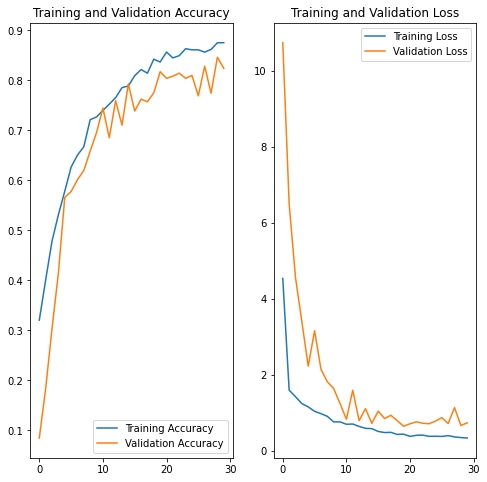

In [94]:
# visualizing the results after model fit 

# fetching the train accuracy and validation accuracy

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# fetching the train loss and validation loss

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

# plot epochs against Training Accuracy and Validation Accuracy and formating the plot

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# plot epochs against Training Loss and Validation Loss and formating the plot

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# showing the plot

plt.show()

### Inference:


- After increase in a convolution layers and used dropouts with batch normalization , We can see from the aobve graphs , that the model is **`not at all Overfitted`** ,with the train accuracy of `0.8722` (87%) and validation accuracy of `0.8241`(82%)


- But the model has `increased in accuracy` on both training and validation set.


- We can see from the aobve graphs , good loss optimization,with the train loss of `0.3259` and validation loss of `0.7318`. 


- Overall `Loss is reduced`.


- After rectifying and increase the sample size in each class , we have seen `significant improve in model accuracy` and `get rid of model Overfitment`.

### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



### Inference on overall activity after rectifying class imbalance:


- After class rebalance , we have seen `significant improve in model accuracy` and `get rid of Overfitment`.Class rebalance actually helps in it.


**` CNN model 1 after class rebalance`** 


- we have used ropouts with batch normalization , We can see from the aobve graphs , that the model is **`less/minimum overfitted`** ,with the train accuracy of `0.8696` (86%) and validation accuracy of `0.7669`(76%)


- But the model has `increased in accuracy` on both training and validation set.


- We can see from the aobve graphs , good loss optimization,with the train loss of `0.3427` and validation loss of `1.2676`. 


- Overall `Loss is reduced`.


**` CNN model 2 after class rebalance`** 


- After increase in a convolution layers and used dropouts with batch normalization , We can see from the aobve graphs , that the model is **`not at all Overfitted`** ,with the train accuracy of `0.8722` (87%) and validation accuracy of `0.8241`(82%)


- But the model has `increased in accuracy` on both training and validation set.


- We can see from the aobve graphs , good loss optimization,with the train loss of `0.3259` and validation loss of `0.7318`. 


- Overall `Loss is reduced`.

**END**